In [1]:
import pandas as pd
import Experiment_SS as exss

# Adjust pandas options to see all columns and to read subgroup descriptions fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 200)

In [2]:
exss.main(course='mathematics', test_size=0.2, min_size=25)

Collected 50 subgroup models.
Complex baseline evaluation metrics: {'r2': 0.8887, 'mae': np.float64(1.0472), 'mse': np.float64(2.5272), 'mean_residual': -0.0166, 'y_pred': 241    10.579435
70     14.529548
6      11.688513
160     4.874653
186    11.643672
146     5.871794
189     8.185622
291    15.092428
384     4.505968
47     19.171583
317     9.156577
191     6.792528
11     11.079415
175     8.290429
389     3.518364
281     9.410465
392     7.744094
64      9.541593
66     12.382668
239     5.933596
14     15.846553
228     8.204434
379     9.798363
233    12.946925
68      8.724567
351    13.060189
130    -0.066161
55      8.061701
82      5.439786
24      8.584784
72      5.768695
325    10.751430
320    13.736635
309    10.595964
223    12.816978
106     7.356243
159    11.616055
13      9.607239
102    12.462221
105    10.717348
182    17.089578
216     5.530553
25      8.511739
371    12.212245
169    14.146749
262    11.402155
84      9.097117
154    11.306919
83     15.01

In [3]:
df_s = pd.read_csv("results/subgroup_results_mathematics.csv")

df_s = df_s[:50]
print(df_s[['r2']].iloc[-1])
#df_s.columns

r2    0.7501
Name: 49, dtype: float64


In [4]:
# Assign rank: one per row (since you now have only subgroup_model rows)
df_s['subgroup_rank'] = (df_s.index + 1).astype("object")
df_s.loc[df_s['model_type'] == 'global', 'subgroup_rank'] = "N/A"

# Round columns for better readability
for col, ndigits in [('cookD', 2), ('r2', 3), ('mae', 3), ('mse', 3), ('mean_residual', 3),
                     ('global_baseline_r2', 3), ('global_baseline_mae', 3), ('global_baseline_mse', 3), ('global_baseline_mean_residual', 3),
                     ('mean_baseline_r2', 3), ('mean_baseline_mae', 3), ('mean_baseline_mse', 3), ('mean_baseline_mean_residual', 3)]:
    if col in df_s.columns:
        df_s[col] = df_s[col].round(ndigits)

# Compare r2 between subgroup_model and global baseline for each row
df_s['subgroup_r2_better'] = (df_s['r2'] > df_s['global_baseline_r2']).astype("object")
df_s.loc[df_s['model_type'] == 'global', 'subgroup_r2_better'] = None
df_s['subgroup_better_global'] = (df_s['ttest_p'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_global'] = None
df_s['subgroup_better_mean'] = (df_s['ttest_p_mean'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_mean'] = None
df_s['global_better_mean'] = (df_s['ttest_p_mean_global'] < 0.1)
df_s.loc[df_s['model_type'] == 'global', 'global_better_mean'] = None

# Add decision column based on the rules
def determine_decision(row):
    sg = row['subgroup_better_global']
    sm = row['subgroup_better_mean']
    gm = row['global_better_mean']
    
    if sg and sm:
        return "True discovery"
    elif sg and not sm:
        return "True discovery, but model not appropriate"
    elif not sg and sm:
        return "Weak discovery"
    elif not sg and not sm and gm:
        return "False discovery"
    else:
        return "Model not appropriate"

df_s['decision'] = df_s.apply(determine_decision, axis=1)

# Specify desired column order
main_cols = [
    'subgroup_rank', 'model_type', 'description', 'decision', 'subgroup_r2_better', 'cookD', 'n_train', 'n_test',
    'r2', 'global_baseline_r2', 'mean_baseline_r2', 
    'mae', 'global_baseline_mae', 'mean_baseline_mae',
    'mse', 'global_baseline_mse', 'mean_baseline_mse',
    'mean_residual', 'global_baseline_mean_residual', 'mean_baseline_mean_residual'
]
rest_cols = [c for c in df_s.columns if c not in main_cols]
new_order = main_cols + rest_cols

# Reorder columns
df_s = df_s[new_order]

/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39243/2205722591.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_global'] = None
/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39243/2205722591.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_s.loc[df_s['model_type'] == 'global', 'subgroup_better_mean'] = None
/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39243/2205722591.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with

In [10]:
df_s[df_s['decision'].isin(['True discovery'])][['subgroup_rank', 'description', 'decision', 'n_test', 'n_train', 'cookD', 'r2', 'global_baseline_r2']]

,subgroup_rank,description,decision,n_test,n_train,cookD,r2,global_baseline_r2
9,10,"Medu in (-0.001, 2.0] ∧ age in (17.0, 18.0] ∧ traveltime in (0.999, 2.0]",True discovery,6,26,173.52,0.888,0.615


In [6]:
df_s[(df_s['decision'].isin(['Model not appropriate', 'Weak discovery'])) & ( df_s['r2'] > 0) & ( df_s['r2'] > df_s['global_baseline_r2'])][['subgroup_rank', 'description', 'decision', 'n_test', 'cookD','r2', 'global_baseline_r2', 'mean_baseline_r2']]

,subgroup_rank,description,decision,n_test,cookD,r2,global_baseline_r2,mean_baseline_r2
11,12,Fjob=='services' ∧ guardian=='father' ∧ higher=='yes',Model not appropriate,6,172.15,0.784,0.726,-0.003
12,13,Fjob=='services' ∧ guardian=='father',Weak discovery,8,170.76,0.824,0.695,-0.056
13,14,"Fjob=='services' ∧ failures in (-0.001, 3.0] ∧ guardian=='father'",Weak discovery,8,170.76,0.824,0.695,-0.056
14,15,Fjob=='services' ∧ Pstatus=='T' ∧ guardian=='father',Weak discovery,8,170.76,0.824,0.695,-0.056
15,16,"Fjob=='services' ∧ guardian=='father' ∧ traveltime in (0.999, 2.0]",Weak discovery,6,170.76,0.856,0.712,-0.108
19,20,"Dalc in (0.999, 2.0] ∧ Medu in (-0.001, 2.0] ∧ age in (17.0, 18.0]",Weak discovery,6,158.93,0.884,0.794,-0.597
35,36,"Fjob=='services' ∧ health in (0.999, 2.0]",Weak discovery,4,99.57,0.960,0.834,-0.013
36,37,"Fjob=='services' ∧ failures in (-0.001, 3.0] ∧ health in (0.999, 2.0]",Weak discovery,4,99.57,0.960,0.834,-0.013


In [7]:
df_s['decision'].value_counts()

decision
Weak discovery           21
False discovery          18
Model not appropriate    10
True discovery            1
Name: count, dtype: int64

In [11]:
df = pd.read_csv('results/coefs_mathematics.csv')

# Create display labels: #1, #2, ...
chosen = [10, 13, 20, 36]


df_lins = df[df['subgroup'].isin(['#'+str(i) for i in chosen] + ['Ω'])]

df_lins = df_lins[df_lins['term'] != 'const']                           

40 48


/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_39243/2816714925.py:19: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  ax = sns.barplot(


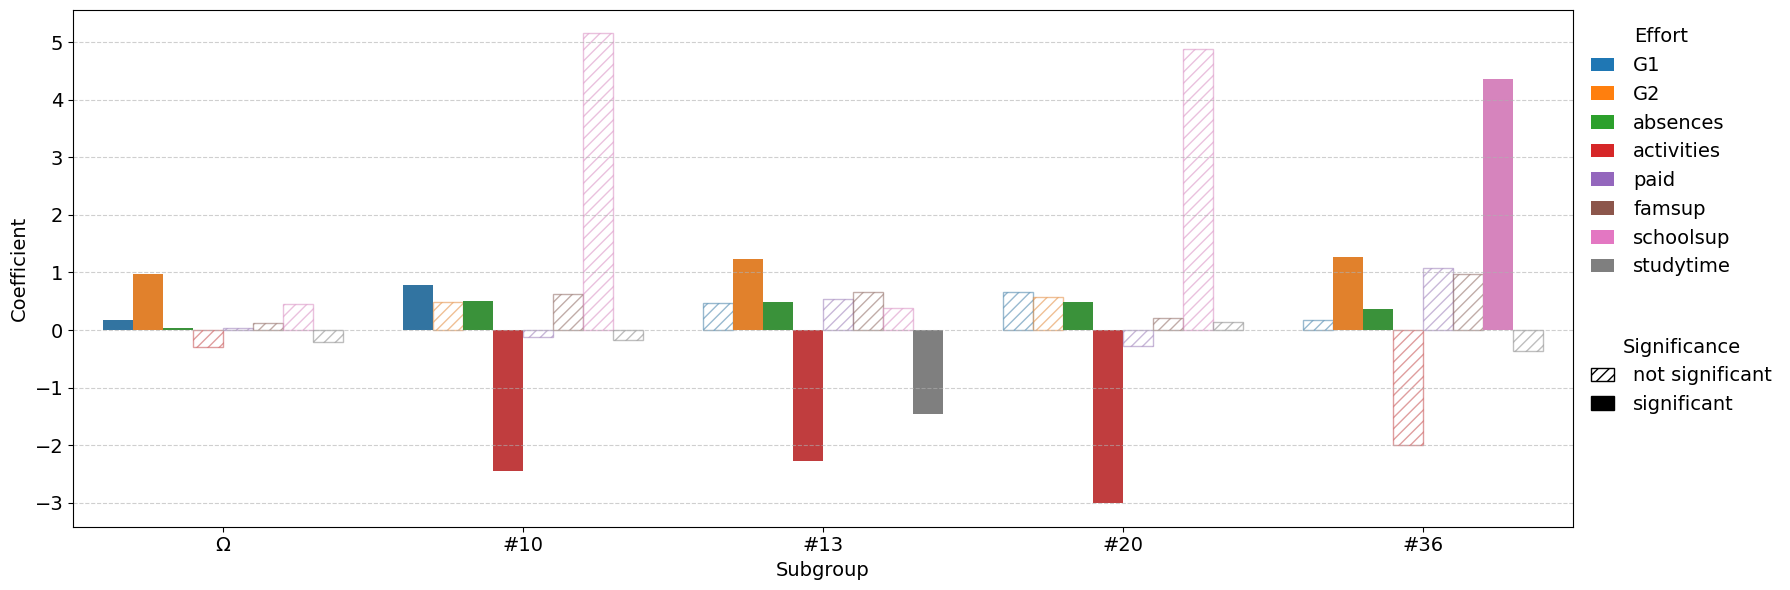

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from matplotlib.patches import Patch


#####
# To DO: Change bar fill depending on significant, yes or no 
#####

palette = sns.color_palette("tab10", 16)
#palette = random.shuffle(palette)
plt.figure(figsize=(18, 6))

df = df_lins#[ df_all['term'] != 'Intercept']

ax = sns.barplot(
    data=df,
    x="subgroup",
    y="coef",
    hue="term",
    dodge=True,
    palette=palette
)
patches_sorted = sorted(ax.patches[:-8], key=lambda p: p.get_x())
print(len(df_lins['significant']), len(ax.patches))
for patch, sig in zip(patches_sorted, df_lins['significant']):
    if sig == 'no':
        patch.set_hatch("///")      # striped fill
        patch.set_edgecolor(patch.get_facecolor())  # keep original color for stripes
        patch.set_facecolor("white")  # base color for hatch
        patch.set_alpha(0.5)
#     # sig == 1 → leave as solid color

ax.set_xlabel("Subgroup", fontsize=14)
ax.set_ylabel("Coefficient", fontsize=14)

# Grid (clean style)how 
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.grid(False)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.set_tick_params(labelsize = 14)

# # Legend outside
# # Smaller legend outside the plot

# Custom legend
# Color legend for terms
terms = df_lins["term"].unique()
palette = sns.color_palette("tab10", len(terms))
color_handles = [Patch(facecolor=palette[i], label=term) for i, term in enumerate(terms)]

# # # Hatch legend for significance
sig_handles = [
    Patch(facecolor="white", edgecolor="black", hatch="///", label="not significant"),
    Patch(facecolor="black", edgecolor="black", label="significant")
]

# Combine legends 
first_legend = ax.legend(handles=color_handles, title="Effort", bbox_to_anchor=(1.0, 1), loc="upper left", fontsize=14, title_fontsize=14,    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=1) 
ax.add_artist(first_legend) 
ax.legend(handles=sig_handles, title="Significance", bbox_to_anchor=(1.0, 0.4), loc="upper left", fontsize=14, title_fontsize=14,    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=1)

plt.tight_layout()
plt.show()